<a href="https://colab.research.google.com/github/ramorales8/GitHub/blob/master/Text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller Twitter Text Blob - Ronald Morales y Karolina Ladino


In [0]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

import json 
with open('/content/drive/My Drive/Textanalytics/tweetsprueba.txt') as f:
    content = f.read()
    content = content.replace('}{','},{')
    search = json.loads('['+content+']')

In [0]:
import pandas as pd

In [56]:


dict_ = {'user': [], 'date': [], 'text': [],'loc':[], 'favorite_count': [],'hashtags':[]}  
for status in search:  
    dict_['user'].append(status['user']['screen_name'])
    dict_['loc'].append(status['user']['location'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])
    dict_['hashtags'].append([hashtag['text'] for hashtag in status['entities']['hashtags']])


print(dict_['text'][0])

RT @notimundoec: .@SantiagoBasabeS: "Lo llamativo es que muchos de los reclamos que la gente le hacía a los medios eran los mismos que se h…


## Jugando con el dataframe en Pandas

In [0]:
# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)  
df2=df.sort_values(by='favorite_count', ascending=False)   
df2.to_csv('prueba.csv')
df2.head(5)
from google.colab import files
uploaded = files.download('prueba.csv')

In [59]:
df.describe()

,favorite_count
count,16256.000000
mean,0.851562
std,30.786938
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3662.000000


In [58]:
df[df['favorite_count']>22].count()

user              75
date              75
text              75
loc               75
favorite_count    75
hashtags          75
dtype: int64

In [60]:
df['text'].str.lower()

0        rt @notimundoec: .@santiagobasabes: "lo llamat...
1        rt @jhon_frank34: presidente de los pueblos in...
2        rt @jokerbsc: las grandes distribuidoras q pro...
3        #paroecuador tranquilos mis adolfos. https://t...
4        rt @jokerbsc: las grandes distribuidoras q pro...
5        las grandes distribuidoras q proveen mercaderí...
6        rt @notimundoec: .@santiagobasabes: "antes de ...
7        rt @notimundoec: .@santiagobasabes: "los parti...
8        rt @notimundoec: .@santiagobasabes: "antes de ...
9        rt @notimundoec: .@santiagobasabes: "los parti...
10       rt @notimundoec: .@santiagobasabes: "se sacrif...
11       rt @ralitodigital: ¡espeluznante!\nel gobierno...
12       rt @estheryez: seguimos en las calles, a pesar...
13       rt @notimundoec: .@santiagobasabes: "antes de ...
14       .@santiagobasabes: "lo llamativo es que muchos...
15       rt @notimundoec: .@santiagobasabes: "antes de ...
16       rt @notimundoec: .@santiagobasabes: "los parti.

## Trabajando con los datos

In [61]:
df['text'].str.split(' ')

0        [RT, @notimundoec:, .@SantiagoBasabeS:, "Lo, l...
1        [RT, @Jhon_frank34:, Presidente, de, los, pueb...
2        [RT, @JokerBsc:, Las, Grandes, Distribuidoras,...
3        [#ParoEcuador, tranquilos, mis, Adolfos., http...
4        [RT, @JokerBsc:, Las, Grandes, Distribuidoras,...
5        [Las, Grandes, Distribuidoras, q, Proveen, Mer...
6        [RT, @notimundoec:, .@SantiagoBasabeS:, "Antes...
7        [RT, @notimundoec:, .@SantiagoBasabeS:, "Los, ...
8        [RT, @notimundoec:, .@SantiagoBasabeS:, "Antes...
9        [RT, @notimundoec:, .@SantiagoBasabeS:, "Los, ...
10       [RT, @notimundoec:, .@SantiagoBasabeS:, "Se, s...
11       [RT, @RalitoDigital:, ¡ESPELUZNANTE!\nEl, Gobi...
12       [RT, @EstherYez:, Seguimos, en, las, calles,, ...
13       [RT, @notimundoec:, .@SantiagoBasabeS:, "Antes...
14       [.@SantiagoBasabeS:, "Lo, llamativo, es, que, ...
15       [RT, @notimundoec:, .@SantiagoBasabeS:, "Antes...
16       [RT, @notimundoec:, .@SantiagoBasabeS:, "Los, .

In [0]:
df.text[df['text'].str.count('RT')>=1].count()

15307

## Preprocesamiento

### Contando frecuencia de palabras

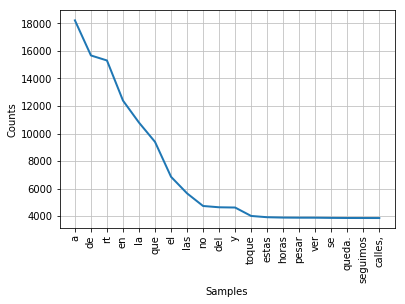

In [62]:

import nltk
import matplotlib.pyplot as plt
%matplotlib inline
tokens = [t for t in ' '.join(dict_['text']).lower().split()]
freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)





### Quitando palabras con ntlk

if stopWords in spanish is not available [download data](https://www.nltk.org/data.html)
``
nltk.download()
``
Corpora->Stopwords->Download
[help](https://jantoniomora.wordpress.com/2017/08/22/instalando-stopwords-en-nltk/)


**TODO: try word_tokenize

In [0]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

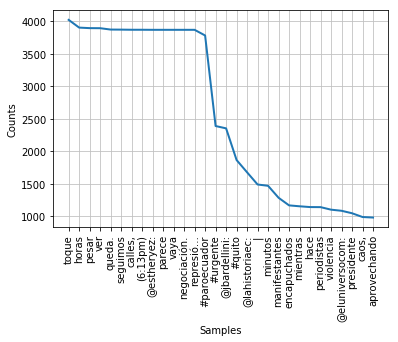

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')    
#tokens = word_tokenize(' '.join(dict_['text']).lower())

stopWords = set(stopwords.words('spanish')+['#','@','rt','https','co'])

clean_tokens = tokens[:]

for token in tokens:
    if token in stopWords:
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
freq.plot(30, cumulative=False)

### Aplicando steemer


In [0]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("spanish")
new_tokens=[stemmer.stem(t)for t in clean_tokens]

#token by ntlk tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')    
tokensv2 = word_tokenize(' '.join(dict_['text']).lower())

print(len(set(new_tokens)),len(set(clean_tokens)),len(set(tokens)),len(set(tokensv2)))

5649 6565 6714 5966


### Más info del texto con nltk



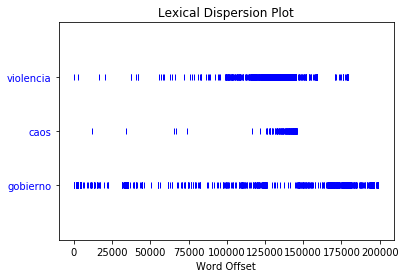

In [0]:
text=nltk.Text(clean_tokens)
text.dispersion_plot(['violencia','caos','gobierno'])

## Nube de palabras




In [63]:
!pip install wordcloud

AttributeError: ignored

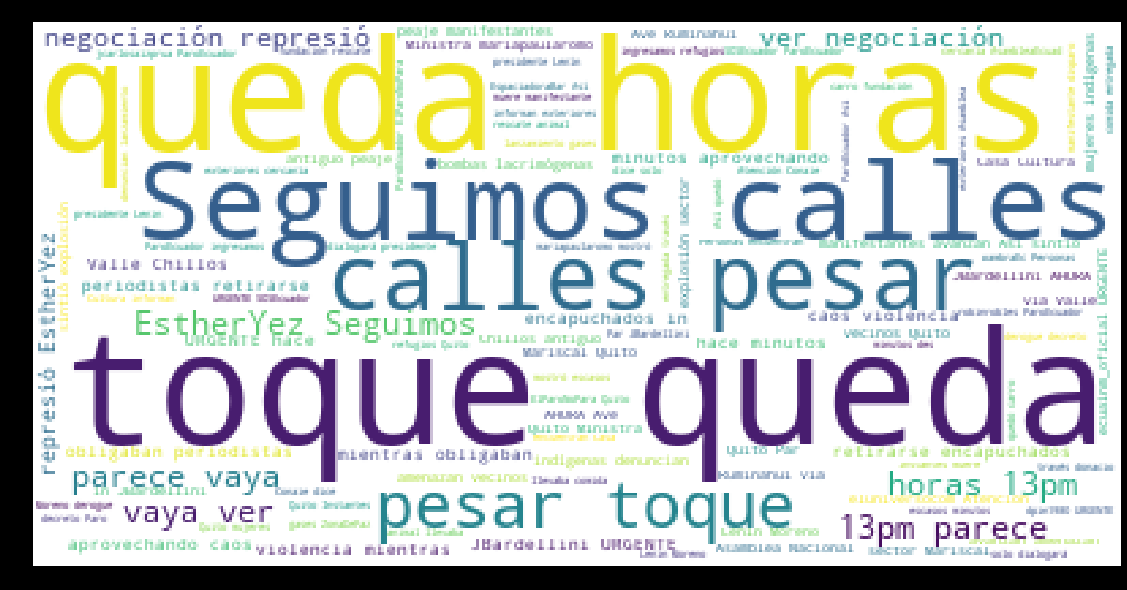

In [64]:
from wordcloud import WordCloud

def wordcloud(tweets,col):
    wordcloud = WordCloud(background_color="white",stopwords=stopWords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")
    plt.save_as('')
#    image = wordcloud.to_image()
#    image.show()
wordcloud(dict_,'text')  

## Scikit-learn

### Bolsa de palabras

In [66]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer


start = time.time()
#Stemmers remove morphological affixes from words, leaving only the word stem.
stemmer = nltk.stem.SnowballStemmer('spanish')

#modified class to vectorize the words
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (stemmer.stem(w) for w in analyzer(doc))

#vectorizer object

vectorizer = StemmedTfidfVectorizer(min_df=2, max_df=0.5,
                                    stop_words=stopWords, decode_error='ignore',strip_accents ='unicode'
                                    )
vectorized = vectorizer.fit_transform(dict_['text'])
end = time.time()
#print(vectorized)

print("time elapsed",end - start)
num_samples, num_features = vectorized.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

time elapsed 4.704719543457031
#samples: 16256, #features: 2288


### Comparando la bolsa de palabras con el post

In [67]:
print(dict_['text'][0])
print('-------------------------------------')
post_v=vectorized[0,:]
post=vectorizer.inverse_transform(post_v)
print(' , '.join(post[0]))

RT @notimundoec: .@SantiagoBasabeS: "Lo llamativo es que muchos de los reclamos que la gente le hacía a los medios eran los mismos que se h…
-------------------------------------
mism , medi , haci , gent , recl , llamat , santiagobasab , notimundoec


### Clusterizando la data

Con Kmeans

In [0]:
from sklearn.cluster import KMeans

def post_cluster(num_clusters,verbose=0):
    start = time.time()
    # TODO:remove random state...
    # TODO: change the method
    km = KMeans(n_clusters=num_clusters, n_init=1, verbose=verbose, random_state=3)
    clustered = km.fit(vectorized)
    end = time.time()
    print("time elapsed",end - start)
    print("km.labels_=%s" % set(km.labels_))
    print("km.labels_.shape=%s" % km.labels_.shape)
    return km

km=post_cluster(6,verbose=1)

df=df.assign(labels=km.labels_)

Initialization complete
Iteration  0, inertia 21296.141
Iteration  1, inertia 10966.747
Iteration  2, inertia 10819.873
Iteration  3, inertia 10755.216
Iteration  4, inertia 10623.988
Iteration  5, inertia 10583.848
Iteration  6, inertia 10574.288
Iteration  7, inertia 10566.101
Iteration  8, inertia 10565.009
Iteration  9, inertia 10555.022
Iteration 10, inertia 10550.480
Converged at iteration 10: center shift 0.000000e+00 within tolerance 4.018389e-08
time elapsed 2.725733995437622
km.labels_={0, 1, 2, 3, 4, 5}
km.labels_.shape=16256


category  0


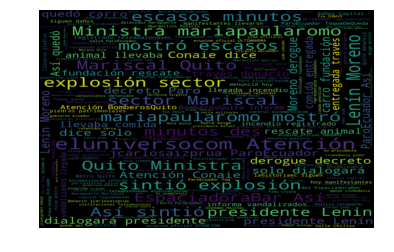

category  1


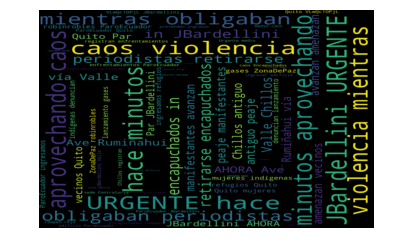

category  2


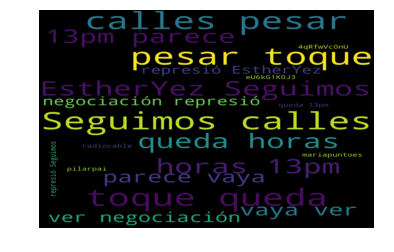

category  3


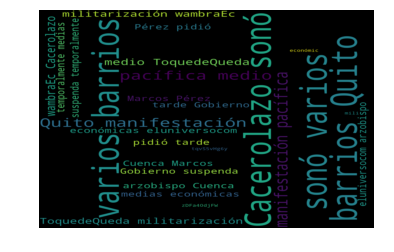

category  4


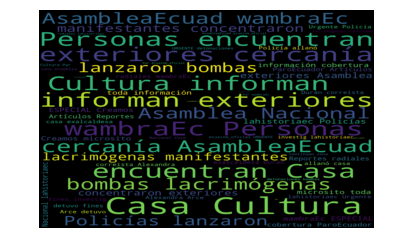

category  5


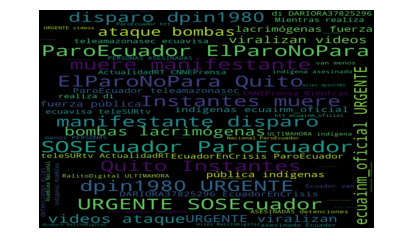

In [0]:
import numpy as np
def groupwordcloud(data,category):
    a=np.array(data)

    for  i in set(category):
        print('category ',i)
        wordcloud = WordCloud(width=1200,height=1200,stopwords=stopWords).generate('\n'.join(a[category==i]))
        #plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
        plt.axis("off")
        plt.show()


groupwordcloud(dict_['text'],km.labels_)

In [0]:
import scipy as sp

## https://twitter.com/IvanDuque/status/1168996298143481856?ref_src=twsrc%5Etfw
new_post='Toque de queda'


def analyze_new_post(km,new_post):
    print(new_post)
    new_post_vec = vectorizer.transform([new_post])
#    print (new_post_vec)
    # como el resultado es una tupla zip(datos,dtype) obtenemos solo el arreglo
    new_post_label = km.predict(new_post_vec)[0]   

    similar_indices = (km.labels_ == new_post_label).nonzero()[0]

    # hacer una medicion que tanto se parecen los que estan en el mismo cluster

    similar = []
    for i in similar_indices:
        dist = sp.linalg.norm((new_post_vec - vectorized[i]).toarray())  
        similar.append((dist,km.labels_[i], dict_['text'][i]))
    similar = sorted(similar)
    print("Count similar: %i" % len(similar))


    print('.--------------------------------------------------.')
    print(km.cluster_centers_.shape)
    print ((km.cluster_centers_[new_post_label].ravel()))
    dist = sp.linalg.norm((new_post_vec-km.cluster_centers_[new_post_label].ravel()))
    print (dist)
    return similar

similar=analyze_new_post(km,new_post)

#show the more similar post
show_at_1 = similar[0]
print("=== #1 ===")
print(show_at_1)
print()
print('.--------------------------------------------------.')
# show the less similar post
show_at_3 = similar[-1]
print("=== #-1 ===")
print(show_at_3)


Toque de queda
Count similar: 7725
.--------------------------------------------------.
(6, 2288)
[0.00049298 0.00049078 0.00017    ... 0.         0.00010612 0.00020054]
1.0070030283339102
=== #1 ===
(1.104718656673843, 0, 'La @FFAAECUADOR en el #ParoEcuador con la implicación del TOQUE DE QUEDA https://t.co/gexC6NLpzI')

.--------------------------------------------------.
=== #-1 ===
(1.4142135623730951, 0, '⚠️ATENCIÓN⚠️\nde última hora, Indígenas denuncian que el gobierno los engañó, No va a derogar oficialmente el acuerd… https://t.co/aDwq0KElr9')


## Analísis de sentimientos


In [0]:
!pip install spanish_sentiment_analysis

     |████████████████████████████████| 15.8MB 2.9MB/s 
     |████████████████████████████████| 276kB 48.9MB/s 
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp36-cp36m-linux_x86_64.whl size=862310 sha256=9349683b214aee136e6e63be05d6a1331ca719473371e859d14f63c2f9cc1a95
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie


In [65]:
from classifier import *
import re
clf = SentimentClassifier()
dict_['sentiment']=[]
for user,tweet in zip(dict_['user'],dict_['text']):
  #removerl a dirrecion IP
    tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    value=clf.predict(tweet)
    dict_['sentiment'].append(value)
    #print(user+ ' ==> %.3f' %value + ': '+tweet)
    
print(dict_['user'][0]+ ' ==> %.3f' %dict_['sentiment'][0] + ': '+dict_['text'][0])    

edwinchamba21 ==> 0.324: RT @notimundoec: .@SantiagoBasabeS: "Lo llamativo es que muchos de los reclamos que la gente le hacía a los medios eran los mismos que se h…


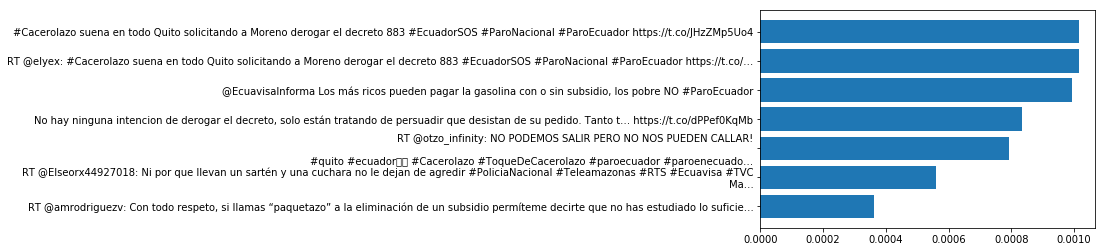

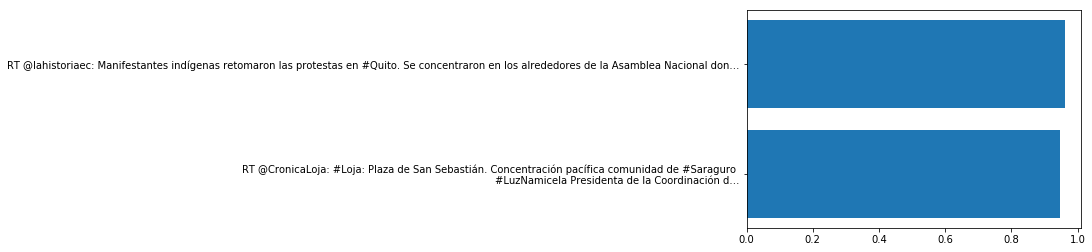

In [0]:

#df = pd.DataFrame(dict_)  
df=df.assign(labels=km.labels_)
df=df.assign(sentiment=dict_['sentiment'])

df2=df.sort_values(by='sentiment') 

plt.figure()
plt.barh(df2['text'][:10], df2['sentiment'][:10])
plt.show()


plt.figure()
plt.barh(df2['text'][-10:], df2['sentiment'][-10:])
plt.show()

### TextBlob


In [0]:
!pip install textblob

In [0]:
from textblob import TextBlob
analysis = TextBlob("hola mundo")
eng=analysis.translate(to='en')
print(eng)

Hello World


In [0]:
from textblob import TextBlob

dict_['subjectivity']=[]
dict_['polarity']=[]
n=len(dict_['user'])
for i,user,tweet in zip(range(n),dict_['user'],dict_['text']):    
    analysis = TextBlob(tweet)
    if i%100==0:
        print(i/n*100)
    try:
      eng=analysis.translate(to='en')
      dict_['polarity'].append(eng.sentiment.polarity)
      dict_['subjectivity'].append(eng.sentiment.subjectivity)  
    except:
      dict_['polarity'].append(float('nan'))
      dict_['subjectivity'].append(float('nan'))
      print('error in ' + tweet )

    


0.0
3.107520198881293
6.215040397762586
9.322560596643878
12.430080795525171
error in ¡Ya viene @Col4Punto0! 🔝Un espacio de inspiración, intercambio, aprendizaje y apropiación de ideas y experiencias e… https://t.co/B8owpLTHXo
error in Desde la CPEM lideramos la articulación y el fortalecimiento institucional en favor de la igualdad de oportunidades… https://t.co/WtQWBW4Zs2
error in A esta hora @atribinu Consejera Presidencial para la Equidad de la Mujer participa en el Conversatorio “Liderazgo d… https://t.co/bNPa94ILEP
error in RT @DAFP_COLOMBIA: Primera Ministra de Nueva Zelanda, @HelenClarkNZ (1999-2008) estará en el conversatorio: Liderazgo de Mujeres en el Sect…
15.537600994406464
error in RT @atribinu: Apoyando las iniciativas para fomentar y mejorar las condiciones de las mujeres en el campo #lamujerenelcampo https://t.co/BJ…
error in #ColombiaÁgil 🇨🇴 Queremos facilitarte la vida y ahorrarte tiempo. Participa en nuestra campaña --&gt;&gt;… https://t.co/7ssFGZdXBN
error in RT @C

In [0]:
print(len(dict_['subjectivity']))

df=df.assign(polarity2=dict_['polarity'])
df=df.assign(subjetivity=dict_['subjectivity'])
df.describe()

3404


,favorite_count,labels,sentiment,polarity2,subjetivity
count,3404.000000,3404.000000,3404.000000,418.000000,418.000000
mean,25.685664,1.516451,0.235268,0.073755,0.232625
std,69.042398,1.897775,0.229870,0.220270,0.289399
min,0.000000,0.000000,0.000338,-0.800000,0.000000
25%,5.000000,0.000000,0.053484,0.000000,0.000000
50%,11.000000,0.000000,0.150745,0.000000,0.025000
75%,22.000000,4.000000,0.356209,0.136364,0.489583
max,1694.000000,5.000000,0.973709,1.000000,1.000000


0.16286147066958176


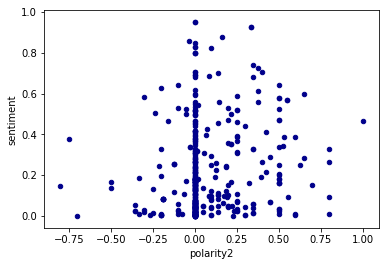

In [0]:


df.to_csv('result.csv')
print(df['polarity2'].corr(df['sentiment']))
ax1 = df.plot.scatter(x='polarity2',
                       y='sentiment',
                       c='DarkBlue')



We invite you to test [Vader](https://github.com/cjhutto/vaderSentiment) (Valence Aware Dictionary and sEntiment Reasoner) which is a lexicon and rule-based sentiment analysis tool (Hard-coded) that is specifically attuned to sentiments expressed in social media. I am sorry just english , you have to translate too